In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
def load_data():
    '''
    Parameters
    ----------
    None
        Loads data into dataframe and returns df and df_copy

    Returns
    -------
    df, copy of df

    '''
    df = pd.DataFrame()
    
    for file in os.listdir('Data'):
        if '2019' in file:
            print('...Reading file "{}"...'.format(file))
            df = df.append(pd.read_csv('Data/' + file,
                                       parse_dates = ['starttime',
                                                      'stoptime']))
    df = df.reset_index(drop = True)
    
    return df, df.copy()

In [ ]:
df, df_copy = load_data()

In [ ]:
df.head()

In [4]:
def setup_dataframe(df):
    '''
    Parameters
    ----------
    df: input dataframe.
        Adds new columns for start_hour, start_day

    Returns
    -------
    adjusted dataframe
    
    '''
    # Ride start hour
    print('\n...Collecting starting hour...')
    df['start_hour'] = df['starttime'].apply(lambda x: x.hour)
    
    # Ride start day
    print('\n...Collecting start day...')
    df['start_day'] = df['starttime'].apply(lambda x: x.weekday())
    
    # Ride start month
    print('\n...Collecting starting month...')
    df['start_month'] = df['starttime'].apply(lambda x: x.month)
    
    return df

In [5]:
df = setup_dataframe(df)

...Reading file "201901-bluebikes-tripdata.csv"...
...Reading file "201902-bluebikes-tripdata.csv"...
...Reading file "201903-bluebikes-tripdata.csv"...
...Reading file "201904-bluebikes-tripdata.csv"...
...Reading file "201905-bluebikes-tripdata.csv"...
...Reading file "201906-bluebikes-tripdata.csv"...
...Reading file "201907-bluebikes-tripdata.csv"...
...Reading file "201908-bluebikes-tripdata.csv"...
...Reading file "201909-bluebikes-tripdata.csv"...
...Reading file "201910-bluebikes-tripdata.csv"...
...Reading file "201911-bluebikes-tripdata.csv"...
...Reading file "201912-bluebikes-tripdata.csv"...

...Collecting starting hour...

...Collecting start day...

...Collecting starting month...


In [12]:
df.head()

--- Preview of Data Set ---


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_hour,start_day,start_month
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,0,1,1
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,0,1,1
2,458,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1,0,1,1
3,364,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1,0,1,1
4,681,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2,0,1,1


In [11]:
print('--- Example Entry ---')
df.iloc[0]


--- Example Entry ---


tripduration                                                   371
starttime                               2019-01-01 00:09:13.798000
stoptime                                2019-01-01 00:15:25.336000
start station id                                                80
start station name         MIT Stata Center at Vassar St / Main St
start station latitude                                     42.3621
start station longitude                                   -71.0912
end station id                                                 179
end station name                                     MIT Vassar St
end station latitude                                       42.3556
end station longitude                                     -71.1039
bikeid                                                        3689
usertype                                                Subscriber
birth year                                                    1987
gender                                                        

In [13]:
df.describe().T


--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
tripduration,2519648.0,1045.876419,1965.292020,61.000000,418.000000,707.000000,1183.000000,86339.000000
start station id,2519648.0,142.275172,118.315887,1.000000,55.000000,99.000000,190.000000,446.000000
start station latitude,2519648.0,42.357463,0.055872,0.000000,42.348706,42.358100,42.365994,42.414802
start station longitude,2519648.0,-71.087955,0.093076,-71.166491,-71.104412,-71.089811,-71.068922,0.000000
end station id,2519648.0,141.642643,118.050610,1.000000,54.000000,98.000000,190.000000,446.000000
end station latitude,2519648.0,42.357300,0.081745,0.000000,42.348706,42.358100,42.365994,42.414802
end station longitude,2519648.0,-71.087478,0.136729,-71.166491,-71.104412,-71.088220,-71.067811,0.000000
bikeid,2519648.0,3637.908047,1287.217123,1.000000,2746.000000,3670.000000,4498.000000,6173.000000
birth year,2519648.0,1984.756855,11.454521,1923.000000,1977.000000,1989.000000,1994.000000,2003.000000
gender,2519648.0,1.125284,0.573436,0.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
def remove_outliers(df):
    '''
    Parameters
    ----------
    df: input dataframe.
        Removes trips >24 hours
        Removes rides with birth year <1920
        Respect to anyone 100+ still riding but...

    Returns
    -------
    Trimmed dataframe
    
    '''
    long_trips = df[df['tripduration'] > 24 * 60 * 60]
    too_old = df[df['birth year'] < 1920]
    df = df.drop(index = long_trips.index.append(too_old.index))
    return df

In [8]:
df = remove_outliers(df)

In [38]:
df.describe().T


--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
tripduration,2519648.0,1045.876419,1965.292020,61.000000,418.000000,707.000000,1183.000000,86339.000000
start station id,2519648.0,142.275172,118.315887,1.000000,55.000000,99.000000,190.000000,446.000000
start station latitude,2519648.0,42.357463,0.055872,0.000000,42.348706,42.358100,42.365994,42.414802
start station longitude,2519648.0,-71.087955,0.093076,-71.166491,-71.104412,-71.089811,-71.068922,0.000000
end station id,2519648.0,141.642643,118.050610,1.000000,54.000000,98.000000,190.000000,446.000000
end station latitude,2519648.0,42.357300,0.081745,0.000000,42.348706,42.358100,42.365994,42.414802
end station longitude,2519648.0,-71.087478,0.136729,-71.166491,-71.104412,-71.088220,-71.067811,0.000000
bikeid,2519648.0,3637.908047,1287.217123,1.000000,2746.000000,3670.000000,4498.000000,6173.000000
birth year,2519648.0,1984.756855,11.454521,1923.000000,1977.000000,1989.000000,1994.000000,2003.000000
gender,2519648.0,1.125284,0.573436,0.000000,1.000000,1.000000,1.000000,2.000000


In [17]:
def get_station_ids(df):
    '''
    Parameters
    ----------
    df: dataframe to gather unique stations ids

    Returns
    -------
    dict: {station ID: station name}

    '''
    id_df = df[['start station id', 'start station name']].\
                drop_duplicates().reset_index(drop = True)
    id_dict = {id_df['start station id'].loc[i]: 
               id_df['start station name'].loc[i]
               for i in range(id_df.shape[0])}
    
    return id_dict   

In [20]:
def top_stations(df, n, show = True):
    '''
    Parameters
    ----------
    df: input dataframe
    n: number of top stations to look at
        Finds top starting and ending stations
        Plots top starting and ending stations
    show: whether to print out (default: True)

    Returns
    -------
    top_start_stations, top_end_stations
    
    '''
    station_ids = get_station_ids(df)
    
    top_start_stations = df['start station id'].value_counts()[:n]
    top_end_stations = df['end station id'].value_counts()[:n]
    
    if show:
        print('--- Top {} Starting Stations ---'.format(n))
        [print('{}. [{}] {}'.format(
         i, j, station_ids[j]))
         for i, j in enumerate(top_start_stations.index, 1)]
        
        print('\n--- Top {} Ending Stations ---'.format(n))
        [print('{}. [{}] {}'.format(
         i, j, station_ids[j]))
         for i, j in enumerate(top_end_stations.index, 1)]
    
    return top_start_stations, top_end_stations

In [22]:
top_start_stations, top_end_stations = top_stations(df, 5, True)

--- Top 5 Starting Stations ---
1. [67] MIT at Mass Ave / Amherst St
2. [68] Central Square at Mass Ave / Essex St
3. [80] MIT Stata Center at Vassar St / Main St
4. [22] South Station - 700 Atlantic Ave
5. [107] Ames St at Main St

--- Top 5 Ending Stations ---
1. [67] MIT at Mass Ave / Amherst St
2. [68] Central Square at Mass Ave / Essex St
3. [107] Ames St at Main St
4. [190] Nashua Street at Red Auerbach Way
5. [80] MIT Stata Center at Vassar St / Main St


In [23]:
def get_weekday(day_num):
    '''
    Parameters
    ----------
    day_num: int
        Returns string of day of week

    Returns
    -------
    Day of week (string)

    '''
    day = {0: 'Monday',
           1: 'Tuesday',
           2: 'Wednesday',
           3: 'Thursday',
           4: 'Friday',
           5: 'Saturday',
           6: 'Sunday'}
    
    return day[int(day_num)]

In [24]:
def get_month(month_num):
    '''
    Parameters
    ----------
    month_num: int
        Returns string of month

    Returns
    -------
    Month (string)

    '''
    month = {1: 'January',
             2: 'February',
             3: 'March',
             4: 'April',
             5: 'May',
             6: 'June',
             7: 'July',
             8: 'August',
             9: 'September',
             10: 'October',
             11: 'November',
             12: 'December'}
    
    return month[int(month_num)]

In [25]:
def most_traveled_months(df, ax):
    '''
    Parameters
    ----------
    df: adjusted dataframe with start_month column added

    Returns
    -------
    bar chart of most traveled months
    '''
    months, rides = np.unique(df['start_month'], return_counts = True)
    
    colors = mpl.cm.summer(rides / max(rides))
    bar = ax.bar(x = [get_month(month) for month in months],
                 height = rides,
                 color = colors,
                 zorder = 2)
    ax.grid(axis = 'y', zorder = 1)
    ax.tick_params(axis = 'x', labelrotation = 70)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Rides')
    ax.set_title('Total Rides per Month')
    ax.set_facecolor('lightgray')
    return bar

In [26]:
def most_traveled_days(df, ax):
    '''
    Parameters
    ----------
    df: adjusted dataframe with start_days column added

    Returns
    -------
    bar chart of most traveled days
    '''
    days, rides = np.unique(df['start_day'], return_counts = True)
    
    colors = mpl.cm.summer(rides / max(rides))
    bar = ax.bar(x = [get_weekday(day) for day in days],
                 height = rides,
                 color = colors,
                 zorder = 2)
    ax.grid(axis = 'y', zorder = 1)
    ax.tick_params(axis = 'x', labelrotation = 70)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Total Rides')
    ax.set_title('Total Rides per Day')
    ax.set_facecolor('lightgray')
    return bar

In [27]:
def most_traveled_times(df, ax):
    '''
    Parameters
    ----------
    df: adjusted dataframe with start_hour column added

    Returns
    -------
    bar chart of most traveled hours
    '''
    hours, rides = np.unique(df['start_hour'], return_counts = True)
    
    colors = mpl.cm.summer(rides / max(rides))
    bar = ax.bar(x = hours,
                 height = rides,
                 color = colors,
                 zorder = 2)
    ax.grid(axis = 'y', zorder = 1)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Total Rides')
    ax.set_xticks(np.arange(0, 23, 3))
    ax.set_title('Total Rides per Hour')
    ax.set_facecolor('lightgray')
    return bar

In [28]:
def rides_by_gender(df, ax):
    '''
    Parameters
    ----------
    df: adjusted dataframe

    Returns
    -------
    bar chart of rides by gender
    '''
    gender, rides = np.unique(df['gender'], return_counts = True)
    
    colors = mpl.cm.summer(rides / max(rides))
    bar = ax.bar(x = gender,
                 height = rides,
                 color = colors,
                 zorder = 2)
    ax.grid(axis = 'y', zorder = 1)
    ax.tick_params(axis = 'x', labelrotation = 0)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Male', 'Female', 'Prefer not to say'])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Total Rides')
    ax.set_title('Total Rides per Gender')
    ax.set_facecolor('lightgray')
    return bar

In [29]:
def matrix_plot():
    '''
    Parameters
    ----------
    df: adjusted dataframe

    Returns
    -------
    2 x 2 subplots
    '''
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2,
                                                 ncols = 2,
                                                 figsize = (15, 15))
    most_traveled_months(df, ax1)
    most_traveled_days(df, ax2)
    most_traveled_times(df, ax3)
    rides_by_gender(df, ax4)
    plt.tight_layout()

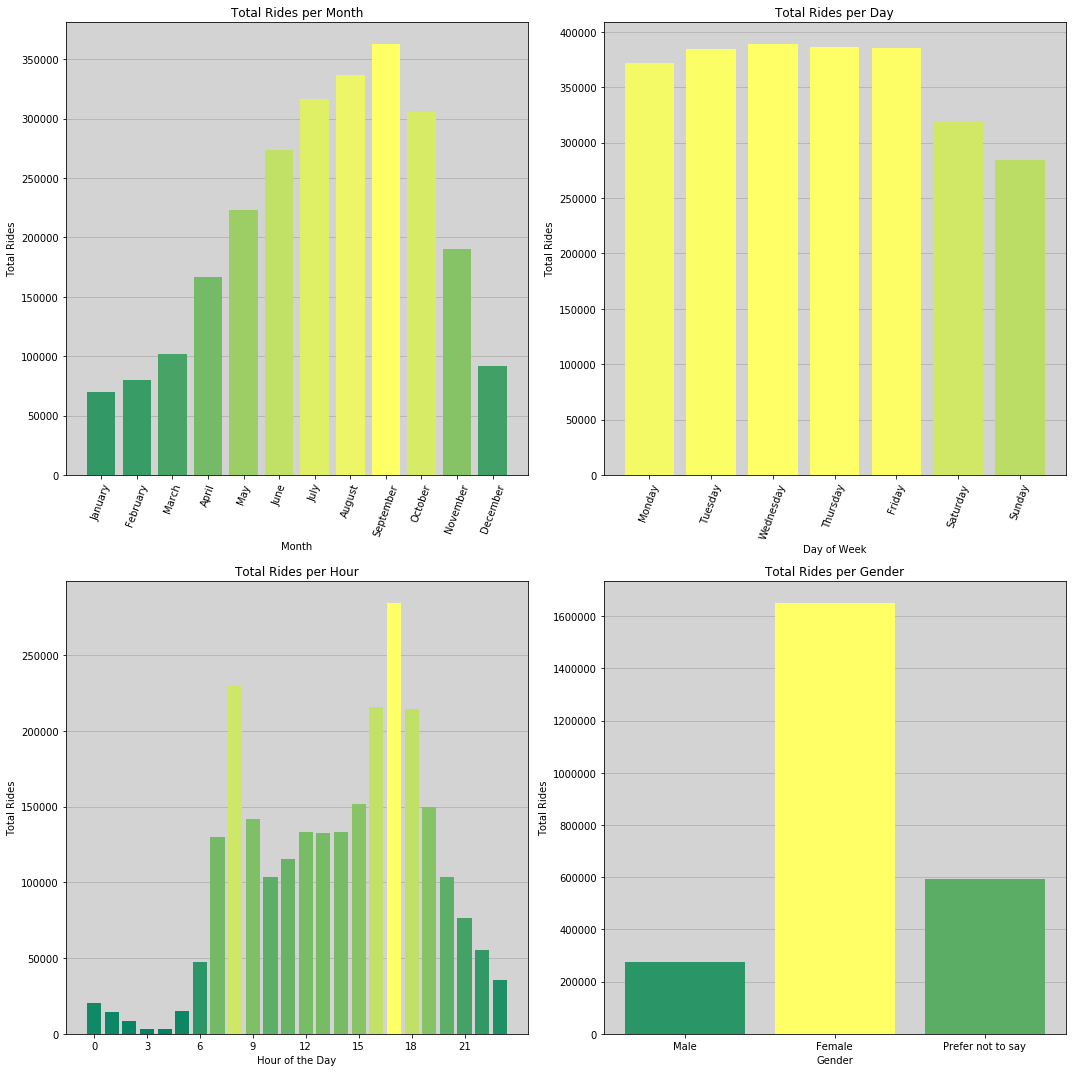

In [30]:
matrix_plot()

In [31]:
def plot_legend(df, sta_nums):
    '''
    Parameters
    ----------
    df: adjusted dataframe
    sta_nums: set of station numbers to be plotted
        
    Returns
    -------
    Nothing.
    Adds consistent stylized legend with station IDs/names to graphs.
    
    '''
    station_ids = get_station_ids(df)
    handles = [mpl.patches.Patch(facecolor = 'k',
                                 edgecolor = 'k',
                                 label = '{}: {}'.format(num,
                                                         station_ids[num]))
               for num in sorted(list(sta_nums))]
    leg = plt.legend(handles = handles,
                     loc = 'upper center',
                     bbox_to_anchor = (0.5, -0.05),
                     shadow = True,
                     ncol = 2,
                     handlelength = 0,
                     handletextpad = 0,
                     fancybox = True)
    for item in leg.legendHandles:
        item.set_visible(False)
    leg.get_frame().set_facecolor('lightblue')

In [66]:
def network_graph(df, n):
    '''
    Parameters
    ----------
    df: adjusted dataframe
    n: (int) number of rides to plot

    Returns
    -------
    network graph of top n routes
    '''
    grouped = df.groupby(['start station id', 'end station id']).count()\
                     ['tripduration']
    grouped = grouped.nlargest(n)
    
    station_numbers = set()
    edge_collection = []
    for i in grouped.index:
        edge_collection.append(i)
        station_numbers.update(i)
    
    G = nx.DiGraph()
    G.add_nodes_from(station_numbers)
    G.add_edges_from(edge_collection)
    
    pos = nx.layout.circular_layout(G)
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    
    plt.figure(figsize = (10, 10))
    nodes = nx.draw_networkx_nodes(G,
                                   pos,
                                   node_size = 5,
                                   node_color = 'black')
    edges = nx.draw_networkx_edges(G,
                                   pos,
                                   node_size = 5,
                                   arrowstyle = '-|>',
                                   arrowsize = 20,
                                   edge_color = edge_colors,
                                   edge_cmap = plt.cm.rainbow,
                                   width = 2)
    
    for i in range(M):
        edges[i].set_alpha(edge_alphas[i])
    pc = mpl.collections.PatchCollection(edges,
                                         cmap = plt.cm.rainbow)
    pc.set_array(edge_colors)
    cbar = plt.colorbar(pc,
                        fraction = 0.04,
                        pad = 0.01)
    cbar.ax.tick_params(labelsize = 20) 
    nx.draw_networkx_labels(G,
                            pos,
                            font_size = 20)
    
    ax = plt.gca()
    ax.set_axis_off()
    plot_legend(df, station_numbers)
    plt.axis('equal')
    plt.title('Top {} Blue Bike Routes'.format(n),
              fontdict = {'fontsize': 20},
              pad = -25)
    plt.show()

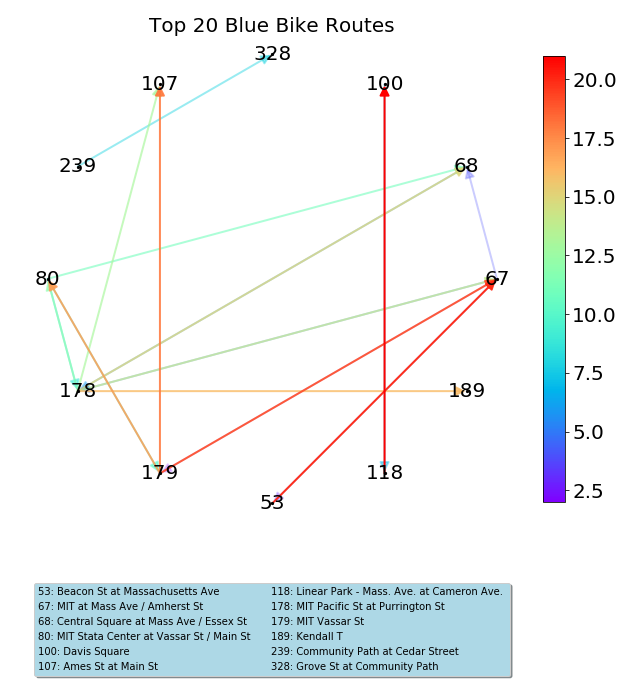

In [69]:
network_graph(df, 20)

In [64]:
def top_trips(df, n):
    '''
    Parameters
    ----------
    df: adjusted dataframe
    n (int): number of top trips to print
        
    Returns
    -------
    Prints top n trips
    
    '''
    station_ids = get_station_ids(df)
    grouped = df.groupby(['start station id', 'end station id']).count()\
                 ['tripduration']
    grouped = grouped.nlargest(n)
    
    edges = []
    for i in grouped.index:
        edges.append(i)
    for num, (i, j) in enumerate(edges, 1):
        print('{}: [{}] {} to [{}] {}'.format(num,
                                              i, station_ids[i],
                                              j, station_ids[j]))

In [68]:
top_trips(df, 20)

1: [178] MIT Pacific St at Purrington St to [80] MIT Stata Center at Vassar St / Main St
2: [80] MIT Stata Center at Vassar St / Main St to [178] MIT Pacific St at Purrington St
3: [67] MIT at Mass Ave / Amherst St to [179] MIT Vassar St
4: [67] MIT at Mass Ave / Amherst St to [53] Beacon St at Massachusetts Ave
5: [178] MIT Pacific St at Purrington St to [107] Ames St at Main St
6: [68] Central Square at Mass Ave / Essex St to [178] MIT Pacific St at Purrington St
7: [53] Beacon St at Massachusetts Ave to [67] MIT at Mass Ave / Amherst St
8: [179] MIT Vassar St to [80] MIT Stata Center at Vassar St / Main St
9: [179] MIT Vassar St to [107] Ames St at Main St
10: [239] Community Path at Cedar Street to [328] Grove St at Community Path
11: [179] MIT Vassar St to [67] MIT at Mass Ave / Amherst St
12: [67] MIT at Mass Ave / Amherst St to [68] Central Square at Mass Ave / Essex St
13: [80] MIT Stata Center at Vassar St / Main St to [179] MIT Vassar St
14: [118] Linear Park - Mass. Ave. at 

In [59]:
def rides_per_dock(df, sta_df, n):
    '''
    Parameters
    ----------
    df: adjusted dataframe
    station_df: dataframe with station names and total docks
    n: (int) number of stations to look at
    start: (bool) whether to look at starting (default) or ending stations

    Returns
    -------
    bar chart of rides per station for top n -ending- stations
    '''
    station_ids = get_station_ids(df)
    
    # Concatenate top starting/ending stations on station ID
    top_df = pd.concat(top_stations(df, -1, False), axis = 1).reset_index()
    top_df = top_df.nlargest(n, 'end station id')
    top_df.columns = ['ID', 'Start rides', 'End rides']
    
    # Station_df uses names instead of numbers, so need to join on names
    top_df['Name'] = top_df['ID'].apply(lambda x: station_ids[x])
    top_df = top_df.join(sta_df.set_index('Name'), on = 'Name')
    
    # Some stations have 0 docks. Delete, but worth investigating separately
    top_df = top_df[top_df['Total docks'] != 0]
    
    # Calculate rides per dock for starting/ending stations
    top_df['Starting rides per dock'] = \
        top_df.apply(lambda x: x['Start rides']/x['Total docks'], axis = 1)
    top_df['Ending rides per dock'] = \
        top_df.apply(lambda x: x['End rides']/x['Total docks'], axis = 1)
    top_df = top_df.sort_values(by = 'Ending rides per dock')
    
    # Pull out useful columns
    top_df = top_df[['ID', 'Ending rides per dock',
                     'Starting rides per dock']].set_index('ID')
    
    # Plot
    top_df.plot(figsize = (10, 10),
                kind = 'barh',
                colormap = 'coolwarm',
                zorder = 2)
    plt.title('Rides per Dock',
              fontdict = {'fontsize': 20},
              pad = -25)
    plt.xlabel('Rides')
    plt.ylabel('Station Number')
    plt.grid(which = 'major', axis = 'x')
    #plt.tick_params(axis = 'both', labelsize = '15')

    # Shade every other station
    for i, j in enumerate(top_df.index):
        if i % 2 == 0:
            plt.axhspan(i - 0.5,
                        i + 0.5,
                        facecolor = 'lightgray',
                        zorder = 1)
    
    # Plot 2 legends
    ax = plt.gca()
    ax.add_artist(plt.legend(loc = 'lower right'))
    station_numbers = set()
    for i in top_df.index:
        station_numbers.add(i)
    plot_legend(df, station_numbers)
    plt.show()

In [60]:
station_df = pd.read_csv('Data/current_bluebikes_stations.csv', skiprows = 1)
station_df.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
1,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
2,S32023,30 Dane St,42.381001,-71.104025,Somerville,Yes,15
3,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23
4,M32054,699 Mt Auburn St,42.375002,-71.148716,Cambridge,Yes,25


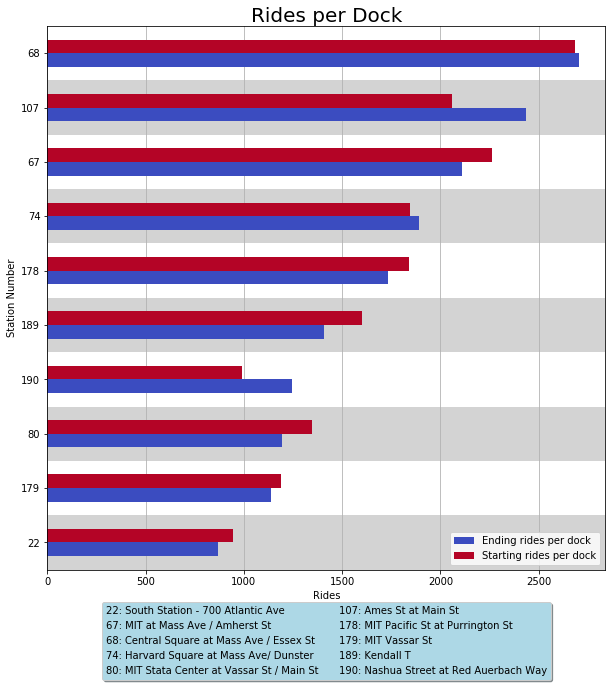

In [61]:
rides_per_dock(df, station_df, 10)